In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import os


import gc
import pickle as pickle

from sklearn.model_selection import KFold

from catboost import CatBoostRegressor
import lightgbm as lgbm

import itertools

import multiprocessing as mp
import importlib
from sklearn.model_selection import train_test_split

In [3]:
#tail -n +2 train.csv | split -l 150000
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [4]:
from os import listdir
from os.path import isfile, join

TRAIN_SPLITS='train'
splits = [f for f in listdir(TRAIN_SPLITS) if isfile(join(TRAIN_SPLITS, f))]

In [14]:
TIMESTEPS=1

import build_segment
importlib.reload(build_segment)

from build_segment import build_segment_f

split_chunks = np.array_split(splits,mp.cpu_count())

#def build_segment_f(splits, number_of_groups,test=False, augment=False, scale=True, noise=0.5):

param_test = False
param_augment = False
param_scale = False
param_noise = 0.3
param_smart_augment = False



if __name__ ==  '__main__':
    pool = mp.Pool(mp.cpu_count())
    res = [pool.apply_async(build_segment_f,\
        args=[chunk,TIMESTEPS,param_test,param_augment,param_scale,param_noise,param_smart_augment]) \
           for chunk in split_chunks]
    pool.close()
    pool.join()

0
0
0
0
0
0
0
0
100
100
100
100
100
100
100
100
200
200
200
200
200
200
200
200
300
300
300
300
300
300
300
300
400
400
400
400
400
400
400
400
500
500
500
500
500
500
500
500


In [15]:
res[0].get()[100]

,acoustic_data_median,acoustic_data_mean,acoustic_data_max,acoustic_data_min,acoustic_data_std,acoustic_data_abs,acoustic_data_q25,acoustic_data_q50,acoustic_data_q75,acoustic_data_sum,acoustic_data_uniq,acoustic_data_pos,acoustic_data_negs,acoustic_data_ssum,acoustic_data_imax,acoustic_data_imin,acoustic_data_abs_nrg,acoustic_data_abs_sum_chg,acoustic_data_autocorr_10,acoustic_data_cid_ce,acoustic_data_kurtosis,acoustic_data_mean_chg,acoustic_data_reocurring_pct,acoustic_data_r_sigma,acoustic_data_ratio_to_length,acoustic_data_skewness,acoustic_data_perc_reocurr_dp,acoustic_data_perc_reocurr_all,acoustic_data_sum_reoccurr_val,acoustic_data_sum_reoccurr_dp,acoustic_data_mean_head,acoustic_data_mean_tail,acoustic_data_abs_diff_head_tail,acoustic_data_pos_head,acoustic_data_neg_head,acoustic_data_pos_tail,acoustic_data_neg_tail,roll_1000_median,roll_1000_mean,roll_1000_max,roll_1000_min,roll_1000_std,roll_1000_abs,roll_1000_q25,roll_1000_q50,roll_1000_q75,roll_1000_sum,roll_1000_uniq,roll_1000_pos,roll_1000_negs,roll_1000_ssum,roll_1000_imax,roll_1000_imin,roll_1000_abs_nrg,roll_1000_abs_sum_chg,roll_1000_autocorr_10,roll_1000_cid_ce,roll_1000_kurtosis,roll_1000_mean_chg,roll_1000_reocurring_pct,roll_1000_r_sigma,roll_1000_ratio_to_length,roll_1000_skewness,roll_1000_perc_reocurr_dp,roll_1000_perc_reocurr_all,roll_1000_sum_reoccurr_val,roll_1000_sum_reoccurr_dp,roll_1000_mean_head,roll_1000_mean_tail,roll_1000_abs_diff_head_tail,roll_1000_pos_head,roll_1000_neg_head,roll_1000_pos_tail,roll_1000_neg_tail,roll_diff_median,roll_diff_mean,roll_diff_max,roll_diff_min,roll_diff_std,roll_diff_abs,roll_diff_q25,roll_diff_q50,roll_diff_q75,roll_diff_sum,roll_diff_uniq,roll_diff_pos,roll_diff_negs,roll_diff_ssum,roll_diff_imax,roll_diff_imin,roll_diff_abs_nrg,roll_diff_abs_sum_chg,roll_diff_autocorr_10,roll_diff_cid_ce,roll_diff_kurtosis,roll_diff_mean_chg,roll_diff_reocurring_pct,roll_diff_r_sigma,roll_diff_ratio_to_length,roll_diff_skewness,roll_diff_perc_reocurr_dp,roll_diff_perc_reocurr_all,roll_diff_sum_reoccurr_val,roll_diff_sum_reoccurr_dp,roll_diff_mean_head,roll_diff_mean_tail,roll_diff_abs_diff_head_tail,roll_diff_pos_head,roll_diff_neg_head,roll_diff_pos_tail,roll_diff_neg_tail,time_to_failure,augmented,segment
0,5.0,4.811387,108.0,-76.0,4.790863,184.0,3.0,5.0,7.0,721708.0,129.0,133141.0,11175.0,818076.0,143729.0,29498.0,6915272.0,389228.0,-0.410707,271.678952,22.444657,0.0,0.875969,0.038907,0.00086,0.210289,0.875969,0.999893,545.0,721173.0,4.951,4.604,23.0,854.0,105.0,939.0,32.0,4.806,4.812987,5.695,4.154,0.212722,1.541,4.662,4.806,4.957,721948.031,1428.0,150000.0,0.0,721948.031,32252.0,86962.0,3.481514e+06,695.117,0.985518,12.302221,0.033754,-0.000002,0.940476,0.05012,0.00952,0.177856,0.940476,0.999433,6520.418,721497.048,4.956994,4.72668,0.136,1000.0,0.0,1000.0,0.0,0.0,0.000002,0.111,-0.105,0.006757,0.216,-0.003,0.0,0.003,0.353,255.0,68651.0,68506.0,695.117,144729.0,143729.0,6.848433,553.025,-0.411145,271.466386,11.43563,2.000013e-08,0.807843,0.04406,0.0017,-0.012879,0.807843,0.999673,0.077,0.796,0.000006,0.000039,0.013,1.0,0.0,452.0,441.0,5.3051,False,xzafi


In [16]:
columns=res[0].get()[0].columns.values

data = pd.DataFrame(columns=columns)


i=0
for r in res:
    for df in r.get():
        data = data.append(df)
        i+=1
        

data.reset_index(drop=True,inplace=True)


In [17]:
data.sample(10)

,acoustic_data_median,acoustic_data_mean,acoustic_data_max,acoustic_data_min,acoustic_data_std,acoustic_data_abs,acoustic_data_q25,acoustic_data_q50,acoustic_data_q75,acoustic_data_sum,acoustic_data_uniq,acoustic_data_pos,acoustic_data_negs,acoustic_data_ssum,acoustic_data_imax,acoustic_data_imin,acoustic_data_abs_nrg,acoustic_data_abs_sum_chg,acoustic_data_autocorr_10,acoustic_data_cid_ce,acoustic_data_kurtosis,acoustic_data_mean_chg,acoustic_data_reocurring_pct,acoustic_data_r_sigma,acoustic_data_ratio_to_length,acoustic_data_skewness,acoustic_data_perc_reocurr_dp,acoustic_data_perc_reocurr_all,acoustic_data_sum_reoccurr_val,acoustic_data_sum_reoccurr_dp,acoustic_data_mean_head,acoustic_data_mean_tail,acoustic_data_abs_diff_head_tail,acoustic_data_pos_head,acoustic_data_neg_head,acoustic_data_pos_tail,acoustic_data_neg_tail,roll_1000_median,roll_1000_mean,roll_1000_max,roll_1000_min,roll_1000_std,roll_1000_abs,roll_1000_q25,roll_1000_q50,roll_1000_q75,roll_1000_sum,roll_1000_uniq,roll_1000_pos,roll_1000_negs,roll_1000_ssum,roll_1000_imax,roll_1000_imin,roll_1000_abs_nrg,roll_1000_abs_sum_chg,roll_1000_autocorr_10,roll_1000_cid_ce,roll_1000_kurtosis,roll_1000_mean_chg,roll_1000_reocurring_pct,roll_1000_r_sigma,roll_1000_ratio_to_length,roll_1000_skewness,roll_1000_perc_reocurr_dp,roll_1000_perc_reocurr_all,roll_1000_sum_reoccurr_val,roll_1000_sum_reoccurr_dp,roll_1000_mean_head,roll_1000_mean_tail,roll_1000_abs_diff_head_tail,roll_1000_pos_head,roll_1000_neg_head,roll_1000_pos_tail,roll_1000_neg_tail,roll_diff_median,roll_diff_mean,roll_diff_max,roll_diff_min,roll_diff_std,roll_diff_abs,roll_diff_q25,roll_diff_q50,roll_diff_q75,roll_diff_sum,roll_diff_uniq,roll_diff_pos,roll_diff_negs,roll_diff_ssum,roll_diff_imax,roll_diff_imin,roll_diff_abs_nrg,roll_diff_abs_sum_chg,roll_diff_autocorr_10,roll_diff_cid_ce,roll_diff_kurtosis,roll_diff_mean_chg,roll_diff_reocurring_pct,roll_diff_r_sigma,roll_diff_ratio_to_length,roll_diff_skewness,roll_diff_perc_reocurr_dp,roll_diff_perc_reocurr_all,roll_diff_sum_reoccurr_val,roll_diff_sum_reoccurr_dp,roll_diff_mean_head,roll_diff_mean_tail,roll_diff_abs_diff_head_tail,roll_diff_pos_head,roll_diff_neg_head,roll_diff_pos_tail,roll_diff_neg_tail,time_to_failure,augmented,segment
3626,4.0,4.390227,151.0,-135.0,5.899997,286.0,2.0,4.0,7.0,658534.0,176.0,126995.0,16133.0,820398.0,27508.0,27760.0,8112608.0,406735.0,-0.435695,233.357087,44.853192,0.000007,0.750000,0.038533,0.001173,0.110046,0.750000,0.999707,448.0,657420.0,3.821,4.301,49.0,893.0,47.0,718.0,246.0,4.398,4.388638,5.356,3.694,0.220894,1.662,4.233,4.398,4.540,658295.663,1460.0,150000.0,0.0,658295.663,27755.0,2152.0,2.896340e+06,811.683,0.975933,14.556129,0.125734,3.193355e-06,0.956164,0.046240,0.009733,-0.138108,0.956164,0.999573,6151.283,657977.245,3.821999,4.379043,0.770,1000.0,0.0,1000.0,0.0,0.0,-3.193333e-06,0.155,-0.148,0.008302,0.303,-0.004,0.0,0.004,-0.479,407.0,69084.0,69171.0,811.683,28508.0,27507.0,10.338523,579.699,-0.432816,233.637094,22.648213,2.000013e-08,0.734644,0.044987,0.002713,0.076265,0.734644,0.999280,-0.131,-0.868,1.000000e-06,0.000080,0.050,1.0,0.0,470.0,487.0,2.057296,False,xzetc
1279,4.0,4.140980,102.0,-104.0,5.123566,206.0,2.0,4.0,6.0,621147.0,157.0,127541.0,14921.0,748981.0,118707.0,118698.0,6509797.0,393357.0,-0.450985,258.648112,32.857319,0.000007,0.777070,0.033953,0.001047,0.006395,0.777070,0.999767,688.0,621064.0,4.220,3.994,19.0,908.0,46.0,880.0,67.0,4.132,4.141696,5.025,3.326,0.226448,1.699,3.988,4.132,4.289,621254.411,1531.0,150000.0,0.0,621254.411,118693.0,138263.0,2.580739e+06,713.812,0.985343,12.343440,0.086363,-1.493343e-06,0.952972,0.045447,0.010207,0.040958,0.952972,0.999520,5953.649,620930.267,4.218002,3.991755,0.055,1000.0,0.0,1000.0,0.0,0.0,1.493333e-06,0.108,-0.110,0.007217,0.218,-0.003,0.0,0.003,0.224,414.0,68624.0,68529.0,713.812,118698.0,119698.0,7.812820,558.953,-0.452329,258.594199,16.820616,-4.666698e-08,0.765700,0.040800,0.002760,-0.015033,0.765700,0.999353,-0.080,-0.074,-2.000000e-06,0.00

In [12]:
for column in data.columns.values:
    #col_mean = data[column].mean()
    if "augmented" not in column:
        data[f'log_{column}'] =  np.log(data[column])

/home/shemery/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
/home/shemery/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [85]:
combinations2 = list(itertools.combinations(data.columns.values, 2))
combinations3 = list(itertools.combinations(data.columns.values, 3))


In [86]:

for combination in combinations2:
    if 'augmented' in combination or 'time_to_failure' in combination:
        continue
    f1 = combination[0]
    f2 = combination[1]
    feature = f'{f1}_mult_{f2}'
    data[feature] = data[f1] * data[f2]
    feature = f'{f1}_plus_{f2}'
    data[feature] = data[f1] + data[f2]
    feature = f'{f1}_div_{f2}'
    #print(feature)
    data[feature] = data[f1] / data[f2]
    data[feature] = pd.to_numeric(data[feature], downcast='float')


In [17]:

for combination in combinations3:
    if 'augmented' in combination or 'time_to_failure' in combination:
        continue
    f1 = combination[0]
    f2 = combination[1]
    f3 = combination[2]
    feature = f'{f1}_mult_{f2}_mult_{f3}'
    data[feature] = data[f1] * data[f2] * data[f3]
    feature = f'{f1}_plus_{f2}_plus_{f3}'
    data[feature] = data[f1] + data[f2] + data[f3]
    feature = f'{f1}_div_{f2}_div_{f3}'
    #print(feature)
    data[feature] = data[f1] / data[f2] / data[f3]
    data[feature] = pd.to_numeric(data[feature], downcast='float')
    

In [10]:
splits

shared_train_data, shared_val_data = train_test_split(splits, test_size=0.1, random_state=42)

import pickle

pickle.dump(shared_train_data, open( "shared_train_data.pickle", "wb" ))
pickle.dump(shared_val_data, open( "shared_val_data.pickle", "wb" ))

In [18]:
drop = ['augmented', 'segment', 'time_to_failure']

# training__ = data[data['segment'].isin(shared_train_data)]
# train_y = training__['time_to_failure']
# train_data = training__.drop(['segment', 'augmented', 'time_to_failure'], axis=1)

# validation__ = data[data['segment'].isin(shared_val_data)]
# val_y = validation__['time_to_failure']
# val_data = validation__.drop(['segment', 'augmented', 'time_to_failure'], axis=1)

data_ = data.drop(columns=drop)
targets = data['time_to_failure']
test_size = 0.1
train_data, val_data, y_train, y_val = train_test_split(data_, targets, test_size=test_size, random_state=42)

# val_size = int(len(data)*0.1)
# non_augmented = data[data['augmented'] == False]
# val_indices = np.random.choice(non_augmented.index.values, val_size)
# val_data = data[data.index.isin(val_indices)].drop(columns=drop)
# train_data = data[~data.index.isin(val_indices)].drop(columns=drop)

# train_y = train_data['time_to_failure']
# val_y = val_data['time_to_failure']

# train_data = train_data.drop('time_to_failure', axis=1)
# val_data = val_data.drop('time_to_failure', axis=1)

In [204]:
len(val_data)

561

In [ ]:
list(all_features)

In [24]:
all_features = train_data.columns.values
cb_features = all_features
lg_features = all_features

In [28]:

cb_model = CatBoostRegressor(iterations=10000,
                             #learning_rate=0.05,
                             eval_metric='MAE',
                             #task_type = "GPU",
                             use_best_model=True,
                             od_type = "Iter",
                             od_wait = 10,
                             #depth=3,
                             #l2_leaf_reg=300,
                             #random_strength=100,
                             #border_count=254,
                             #bagging_temperature = 30,
                             #cat_features=[0],
                             random_seed = 42)



cb_model.fit(train_data[cb_features], y_train, #cat_features=categorical_features_indices,
             eval_set=(val_data[cb_features],y_val),
             #cat_features=categorical_features_pos,         
             verbose=True)

cb_scores = {}
for i,score in enumerate(cb_model.get_feature_importance()):
    cb_scores[cb_features[i]] = score

sorted(cb_scores.items(), key=lambda x: x[1])[::-1]

0:	learn: 5.5055320	test: 5.6456817	best: 5.6456817 (0)	total: 10.3ms	remaining: 1m 43s
1:	learn: 5.3518432	test: 5.4923505	best: 5.4923505 (1)	total: 24.1ms	remaining: 2m
2:	learn: 5.2035187	test: 5.3403115	best: 5.3403115 (2)	total: 39.5ms	remaining: 2m 11s
3:	learn: 5.0598644	test: 5.1941904	best: 5.1941904 (3)	total: 50.1ms	remaining: 2m 5s
4:	learn: 4.9229268	test: 5.0558803	best: 5.0558803 (4)	total: 61.5ms	remaining: 2m 2s
5:	learn: 4.7905613	test: 4.9207494	best: 4.9207494 (5)	total: 71.2ms	remaining: 1m 58s
6:	learn: 4.6641666	test: 4.7909921	best: 4.7909921 (6)	total: 80.4ms	remaining: 1m 54s
7:	learn: 4.5427652	test: 4.6655360	best: 4.6655360 (7)	total: 89.6ms	remaining: 1m 51s
8:	learn: 4.4268991	test: 4.5466626	best: 4.5466626 (8)	total: 99.5ms	remaining: 1m 50s
9:	learn: 4.3143192	test: 4.4304671	best: 4.4304671 (9)	total: 109ms	remaining: 1m 49s
10:	learn: 4.2065924	test: 4.3193089	best: 4.3193089 (10)	total: 119ms	remaining: 1m 48s
11:	learn: 4.1025527	test: 4.2104590	b

[('roll_diff_negs', 23.98445729322915),
 ('roll_diff_pos', 13.723896069344793),
 ('roll_diff_q75', 11.995768594242929),
 ('acoustic_data_negs', 8.002686044947904),
 ('roll_diff_ssum', 6.42821177634159),
 ('acoustic_data_pos', 5.350395739697552),
 ('roll_diff_q25', 3.554928165111395),
 ('acoustic_data_ssum', 3.118348240932872),
 ('acoustic_data_r_sigma', 2.7553873019711976),
 ('acoustic_data_sum_reoccurr_dp', 2.465997118858795),
 ('roll_diff_abs_sum_chg', 2.243751472782935),
 ('acoustic_data_q75', 2.1230407377106895),
 ('roll_1000_abs_sum_chg', 2.0235261720150586),
 ('acoustic_data_sum', 1.9784058257788322),
 ('acoustic_data_abs_sum_chg', 1.7284478037298587),
 ('roll_diff_abs_nrg', 1.7090660044551595),
 ('roll_1000_max', 1.553910713028134),
 ('acoustic_data_autocorr_10', 1.2098989492496888),
 ('roll_diff_autocorr_10', 1.1344650709413118),
 ('acoustic_data_abs_nrg', 1.074197913820284),
 ('acoustic_data_cid_ce', 0.9679748803581112),
 ('acoustic_data_std', 0.8732381114517538)]

In [26]:
cb_features = [item[0] for item in cb_scores.items() if item[1] > 0.5]

In [26]:
cb_model.save_model("cb_model")

In [30]:
lgtrain = lgbm.Dataset(train_data[lg_features], label=y_train)
lgval = lgbm.Dataset(val_data[lg_features], label=y_val)


# needs to keep overfiting under control, default params don't cut it at all
params = {
        "num_threads": 8,
        "verbosity": -1,
        #"zero_as_missing": "true",
        "boosting":'gbdt',
        "objective" : "regression",
        "metric" : "mae",
        "seed": 42,
        "learning_rate" : 0.05,
        #"min_data_in_leaf": 100,
        "num_leaves": 4,
        #"max_depth" : 4,
        #"bagging_fraction": 0.7,
        #"bagging_freq": 1,
        #"feature_fraction": 0.7,
        #"lambda_l1": 10,
}

evals_result = {}
model_lgb = lgbm.train(params, lgtrain, 10000, 
                      valid_sets=[lgval], 
                      early_stopping_rounds=3, 
                      verbose_eval=10, 
                      evals_result=evals_result)


lg_scores = {}
for i,score in enumerate(model_lgb.feature_importance()):
    lg_scores[lg_features[i]] = score

sorted(lg_scores.items(), key=lambda x: x[1])[::-1]

Training until validation scores don't improve for 3 rounds.
[10]	valid_0's l1: 2.52167
[20]	valid_0's l1: 2.31715
[30]	valid_0's l1: 2.23686
[40]	valid_0's l1: 2.19869
[50]	valid_0's l1: 2.17483
[60]	valid_0's l1: 2.16527
[70]	valid_0's l1: 2.15652
Early stopping, best iteration is:
[70]	valid_0's l1: 2.15652


[('roll_diff_pos', 59),
 ('roll_diff_negs', 56),
 ('roll_1000_q75', 16),
 ('roll_diff_q75', 7),
 ('acoustic_data_pos', 7),
 ('acoustic_data_q75', 6),
 ('roll_1000_median', 5),
 ('roll_diff_skewness', 4),
 ('roll_diff_kurtosis', 4),
 ('roll_1000_mean', 4),
 ('acoustic_data_neg_head', 4),
 ('acoustic_data_sum_reoccurr_dp', 4),
 ('roll_diff_neg_tail', 3),
 ('roll_1000_abs_sum_chg', 3),
 ('acoustic_data_sum_reoccurr_val', 3),
 ('acoustic_data_r_sigma', 3),
 ('roll_diff_mean_chg', 2),
 ('roll_diff_autocorr_10', 2),
 ('roll_1000_abs_diff_head_tail', 2),
 ('acoustic_data_cid_ce', 2),
 ('acoustic_data_abs_nrg', 2),
 ('acoustic_data_negs', 2),
 ('roll_diff_pos_tail', 1),
 ('roll_diff_std', 1),
 ('roll_1000_mean_tail', 1),
 ('roll_1000_abs', 1),
 ('acoustic_data_pos_head', 1),
 ('acoustic_data_mean_tail', 1),
 ('acoustic_data_mean_head', 1),
 ('acoustic_data_perc_reocurr_all', 1),
 ('acoustic_data_reocurring_pct', 1),
 ('acoustic_data_kurtosis', 1),
 ('roll_diff_neg_head', 0),
 ('roll_diff_pos_h

In [212]:
lg_features = [item[0] for item in lg_scores.items() if item[1] > 0]

In [172]:
model_lgb.save_model("lg_model")

In [61]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge, LinearRegression,BayesianRidge, HuberRegressor

lr_features = cb_features#[0:5]# + lg_features
lr_features = lg_features


lr_model =  LinearRegression()
lr_model.fit(train_data[lr_features], y_train)

from sklearn.metrics import mean_absolute_error

train_preds = lr_model.predict(val_data[lr_features])
print("mae: ", mean_absolute_error(y_val, train_preds))

mae:  1.6977666135961493


In [215]:
rf_features = all_features

In [218]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)
rf_model.fit(train_data[rf_features], train_y)

val_preds = rf_model.predict(val_data[rf_features])
print("mae: ", mean_absolute_error(val_y, val_preds))

feature_importances = pd.DataFrame(rf_model.feature_importances_,
                        index = rf_features,
                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

mae:  2.190266068833995


,importance
cid_ce,0.735487
abs_sum_chg,0.113368
negs,0.058639
sum_reoccurr_dp,0.052383
ssum,0.017387
uniq,0.014482
r_sigma,0.008254


In [217]:
rf_features = feature_importances[feature_importances['importance'] > 0.005].index.to_list()

In [196]:
stacked_cb_preds = []
stacked_lg_preds = []
stacked_lr_preds = []
stacked_rf_preds = []


# grouped = data[data['segment'].isin(shared_val_data)].sort_values(by='segment')\
#             .drop(['augmented', 'time_to_failure'], axis=1)\
#             .groupby('segment')


# for name, group in grouped:


# stacked_cb_preds.append(cb_model.predict(val_data[cb_features])[0])
# stacked_lg_preds.append(model_lgb.predict(val_data[lg_features])[0])
# stacked_lr_preds.append(lr_model.predict(val_data[lr_features])[0])
# stacked_rf_preds.append(rf_model.predict(val_data[rf_features])[0])




In [80]:
stacked_lstm_preds = pickle.load(open("stacked_lstm_val.pickle", "rb"))

In [197]:
len(stacked_cb_preds)

1

In [244]:
#stacked = pd.DataFrame(columns=['cb', 'lg', 'lr', 'rf', 'lstm', 'target'])
stacked = pd.DataFrame(columns=['cb', 'lg', 'lr', 'rf', 'target'])

# stacked['cb'] = stacked_cb_preds
# stacked['lg'] = stacked_lg_preds
# stacked['lr'] = stacked_lr_preds
# stacked['rf'] = stacked_rf_preds

stacked['cb'] = cb_model.predict(val_data[cb_features])
stacked['lg'] = model_lgb.predict(val_data[lg_features])
stacked['lr'] = lr_model.predict(val_data[lr_features])
stacked['rf'] = rf_model.predict(val_data[rf_features])

#stacked['lstm'] = stacked_lstm_preds
# stacked['target'] = data[data['segment'].isin(shared_val_data)]\
#             .sort_values(by='segment')['time_to_failure'].values

stacked['target'] = val_y.values

In [245]:
stacked.describe()

,cb,lg,lr,rf,target
count,561.000000,561.000000,561.000000,561.000000,561.000000
mean,5.468853,5.783701,5.706799,5.723722,5.726448
std,2.157978,2.314594,2.269270,2.373581,3.687029
min,1.805169,2.385200,-1.104311,2.249201,0.028496
25%,3.282268,3.458367,3.871983,3.500309,2.762798
50%,5.485915,5.832990,5.310550,5.661129,5.330197
75%,7.610873,7.985594,7.515276,7.920885,8.213597
max,9.180271,10.430930,11.355633,10.777282,15.595700


In [255]:
stacked.sample(10)
#meta_model.coef_

,cb,lg,lr,rf,target
279,7.868018,8.451246,8.625830,8.951259,7.370299
14,6.037870,6.304259,5.169946,6.049157,5.305100
384,7.941601,8.143203,9.006382,8.912954,9.488100
511,7.148068,6.981385,6.013589,6.970825,3.221800
271,3.864835,4.105930,4.914100,4.140848,8.023198
541,2.784485,3.023538,3.281436,2.577818,2.638799
0,8.579276,8.520706,9.758717,8.536042,10.088397
552,5.942200,6.028031,4.923022,5.716216,5.330197
365,2.678869,2.854782,4.024322,2.589316,3.543698
284,3.258105,3.286944,3.340401,3.473943,6.349397


In [249]:
data['time_to_failure'].describe()

count    6011.000000
mean     8.001971   
std      4.754135   
min      0.006398   
25%      3.811798   
50%      7.760896   
75%      12.422848  
max      16.103196  
Name: time_to_failure, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3b9f50400>]],
      dtype=object)

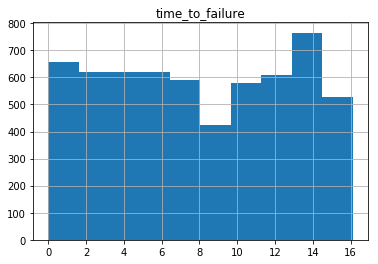

In [57]:
data.hist(column='time_to_failure')#.show()

In [265]:
meta_model =  Lasso(positive=True, alpha=0.1)
meta_model.fit(stacked.drop('target',axis=1)[['cb','lr']], stacked['target'])

from sklearn.metrics import mean_absolute_error

meta_preds = meta_model.predict(stacked.drop('target',axis=1)[['cb','lr']])
print("mae: ", mean_absolute_error(meta_preds, stacked['target']))
meta_model.coef_

mae:  2.143067539751856


array([0.44193793, 0.67889721])

array([0.35814651, 0.6766338 ])

In [54]:
TEST_SPLITS='test'
test_splits = [f for f in listdir(TEST_SPLITS) if isfile(join(TEST_SPLITS, f))]

In [55]:
test_split_chunks = np.array_split(test_splits,mp.cpu_count())
    
    
param_test = True
param_augment = False
param_scale = False
param_noise = 0.6
param_smart_augment= False


if __name__ ==  '__main__':
    pool = mp.Pool(mp.cpu_count())
    test_res = [pool.apply_async(build_segment_f,args=[chunk,TIMESTEPS,param_test,param_augment,param_scale,param_noise,param_smart_augment]) for chunk in test_split_chunks]
    pool.close()
    pool.join()

0
0
0
0
0
0
0
0
100
100
100
100
100
100
100
100
200
200
200
200
200
200
200
200
300
300
300
300
300
300
300
300


In [58]:
columns=test_res[0].get()[0].columns.values

test_data = pd.DataFrame(columns=columns)


i=0
for r in test_res:
    for df in r.get():
        #print(df)
        test_data = test_data.append(df)
        #print(len(test_data))
        i+=1
        

test_data.reset_index(drop=True,inplace=True)
print(len(test_data))

2624


In [ ]:
combinations2 = list(itertools.combinations(test_data.columns.values, 2))
combinations3 = list(itertools.combinations(test_data.columns.values, 3))


In [ ]:

for combination in combinations2:
    if 'seg_id' in combination or 'time_to_failure' in combination:
        continue
    f1 = combination[0]
    f2 = combination[1]
    feature = f'{f1}_mult_{f2}'
    test_data[feature] = test_data[f1] * test_data[f2]
    feature = f'{f1}_plus_{f2}'
    test_data[feature] = test_data[f1] + test_data[f2]
    feature = f'{f1}_div_{f2}'
    #print(feature)
    test_data[feature] = test_data[f1] / test_data[f2]
    test_data[feature] = pd.to_numeric(test_data[feature], downcast='float')


In [ ]:

for combination in combinations3:
    if 'seg_id' in combination or 'time_to_failure' in combination:
        continue
    f1 = combination[0]
    f2 = combination[1]
    f3 = combination[2]
    feature = f'{f1}_mult_{f2}_mult_{f3}'
    test_data[feature] = test_data[f1] * test_data[f2] * test_data[f3]
    feature = f'{f1}_plus_{f2}_plus_{f3}'
    test_data[feature] = test_data[f1] + test_data[f2] + test_data[f3]
    feature = f'{f1}_div_{f2}_div_{f3}'
    #print(feature)
    test_data[feature] = test_data[f1] / test_data[f2] / test_data[f3]
    test_data[feature] = pd.to_numeric(test_data[feature], downcast='float')
    

In [95]:
ids = test_data['seg_id'].apply(lambda id: id.split('.')[0])

In [97]:
cb_preds = cb_model.predict(test_data[cb_features])
lg_preds = model_lgb.predict(test_data[lg_features])
lr_preds = lr_model.predict(test_data[lr_features])
rf_preds = rf_model.predict(test_data[rf_features])

In [ ]:
lr_preds = lr_model.predict(test_data[lr_features])

In [ ]:
preds = (lg_preds * 0.5) + (lr_preds * 0.5)


In [ ]:
cb

In [75]:

submission = pd.DataFrame(ids)
submission.columns = ['seg_id']
submission['time_to_failure'] = cb_preds

submission.to_csv('cb_preds.csv', index=False)

In [76]:
submission["time_to_failure"].describe()

count    2624.000000
mean     5.845028   
std      2.323064   
min      1.509247   
25%      3.843054   
50%      5.470076   
75%      7.927064   
max      10.292519  
Name: time_to_failure, dtype: float64

In [ ]:
submission.head()

In [102]:
cb_preds = pd.read_csv('cb_preds.csv')['time_to_failure']
lg_preds = pd.read_csv('lg_preds.csv')['time_to_failure']
lr_preds = pd.read_csv('lr_preds.csv')['time_to_failure']
rf_preds = pd.read_csv('rf_preds.csv')['time_to_failure']
lstm_preds = pd.read_csv('lstm_preds.csv')['time_to_failure']




In [267]:
np.corrcoef([cb_preds, lg_preds, lr_preds, rf_preds])#, lstm_preds])

array([[1.        , 0.98685109, 0.93244451, 0.98776879],
       [0.98685109, 1.        , 0.93064613, 0.98523281],
       [0.93244451, 0.93064613, 1.        , 0.92330153],
       [0.98776879, 0.98523281, 0.92330153, 1.        ]])

In [124]:
stacked_test = pd.DataFrame(columns=['cb', 'lg', 'lr', 'rf', 'lstm'])
stacked_test['cb'] = cb_preds
stacked_test['lg'] = lg_preds
stacked_test['lr'] = lr_preds
stacked_test['rf'] = rf_preds
stacked_test['lstm'] = lstm_preds


final_preds = meta_model.predict(stacked_test)


In [125]:
submission = pd.DataFrame(ids)
submission.columns = ['seg_id']
submission['time_to_failure'] = final_preds

submission.to_csv('final_preds.csv', index=False)

submission["time_to_failure"].describe()

In [114]:
submission["time_to_failure"].describe()

count    2624.000000
mean     5.694498   
std      2.444551   
min     -6.191154   
25%      3.691049   
50%      5.144718   
75%      7.775610   
max      11.304780  
Name: time_to_failure, dtype: float64

In [126]:
submission["time_to_failure"].describe()

count    2624.000000
mean     5.642406   
std      2.223331   
min     -4.319585   
25%      3.883431   
50%      5.081091   
75%      7.549768   
max      10.355927  
Name: time_to_failure, dtype: float64

In [41]:
from sklearn.model_selection import KFold

stacked_cb = []
stacked_lr = []
stacked_y = []

kf = KFold(n_splits=10)
for train_indices, test_indices in kf.split(data):
    train = data.loc[train_indices]
    test = data.loc[test_indices]
    
    drop = ['augmented', 'segment', 'time_to_failure']
    ttf = 'time_to_failure'
    
    cb_model = CatBoostRegressor(iterations=10000,
                             eval_metric='MAE',
                             use_best_model=True,
                             od_type = "Iter",
                             od_wait = 10,
                             random_seed = 42)

    cb_model.fit(train[cb_features], train[ttf], #cat_features=categorical_features_indices,
             eval_set=(test[cb_features],test[ttf]),
             #cat_features=categorical_features_pos,         
             verbose=False)
    
    stacked_cb.append(cb_model.predict(test[cb_features]))
    
    
    
    lr_model =  LinearRegression()
    lr_model.fit(train[lr_features], train[ttf])

    stacked_lr.append(lr_model.predict(test[lr_features]))
    
    stacked_y.append(test[ttf])
                                       
stacked_cb = [item for sublist in stacked_cb for item in sublist]
stacked_lr = [item for sublist in stacked_lr for item in sublist]
stacked_y = [item for sublist in stacked_y for item in sublist]

In [42]:
stacked_data = pd.DataFrame(columns=['cb','lr', 'target'])
stacked_data['cb'] = stacked_cb
stacked_data['lr'] = stacked_lr
stacked_data['target'] = stacked_y

In [43]:
stacked_data.describe()

,cb,lr,target
count,6011.000000,6011.000000,6011.000000
mean,7.947255,7.998587,8.001971
std,4.071850,4.134289,4.754135
min,1.122596,-4.902598,0.006398
25%,4.051074,4.399447,3.811798
50%,7.681074,7.337867,7.760896
75%,12.032558,12.013711,12.422848
max,15.426508,17.218212,16.103196


In [53]:
meta_model =  Lasso(positive=True, alpha=0.1)
meta_model.fit(stacked_data.drop('target',axis=1)[['cb','lr']], stacked_data['target'])

from sklearn.metrics import mean_absolute_error

meta_preds = meta_model.predict(stacked_data.drop('target',axis=1)[['cb','lr']])
print("mae: ", mean_absolute_error(meta_preds, stacked_data['target']))
meta_model.coef_

mae:  1.7077555089357848


array([0.55622915, 0.45348524])

In [31]:
cb_preds = cb_model.predict(test_data[cb_features])
lr_preds = lr_model.predict(test_data[lr_features])

NameError: name 'test_data' is not defined

In [67]:
preds_data = pd.DataFrame(columns=['cb','lr'])
preds_data['cb'] = cb_preds
preds_data['lr'] = lr_preds


In [68]:
preds_data.describe()

,cb,lr
count,2624.000000,2624.000000
mean,5.845028,5.520178
std,2.323064,2.332845
min,1.509247,-8.805316
25%,3.843054,3.730725
50%,5.470076,4.990853
75%,7.927064,7.355031
max,10.292519,11.160370


In [69]:
preds = meta_model.predict(preds_data)

In [71]:
ids = test_data['seg_id'].apply(lambda id: id.split('.')[0])

submission = pd.DataFrame(ids)
submission.columns = ['seg_id']
submission['time_to_failure'] = preds

submission.to_csv('preds.csv', index=False)

submission["time_to_failure"].describe()

count    2624.000000
mean     5.708729   
std      2.312638   
min     -2.672868   
25%      3.843636   
50%      5.174776   
75%      7.728294   
max      10.397595  
Name: time_to_failure, dtype: float64

In [72]:
submission[submission['time_to_failure'] < 0]

,seg_id,time_to_failure
876,seg_aa98cc,-1.571164
907,seg_c80857,-1.893756
2125,seg_7fa6ec,-2.672868
2539,seg_c243a6,-0.246299
